<a href="https://colab.research.google.com/github/dhasaf/Classification/blob/main/FlightPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Flight price prediction**
### Our goal is to build supervised Natural Language Processing (NLP) machine learning models to predict the price of a flight.

### **Import Libaries**

In [ ]:
import numpy as np
import pandas as pd
import scipy as sp
import sklearn as sk
import os
import tarfile
import urllib

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

### **Load the data**

In [ ]:
flight = pd.read_csv("Flight_price.csv")
flight.head()

Take a 100,000 sample

In [ ]:
flight = flight.sample(n=100000, random_state=42)

### **View data**

In [ ]:
flight.info()

In [ ]:
flight.describe()

In [ ]:
flight.shape

**Check number of null values**

In [ ]:
flight.isnull().sum()

Check duplicates 

In [ ]:
flight.duplicated().sum()

number of unique data for each feature

In [ ]:
flight.nunique()

As we understand from the result above, the "number" column is an index since its unique values are just like the size of our dataset, which is 300153.
So, it will be dropped from our dataset.

In [ ]:
flight.drop(["number"], axis=1, inplace=True)

In [ ]:
flight.drop(["flight"], axis=1, inplace=True)

In [ ]:
flight.shape

convert price from int to float

In [ ]:
flight['price'] = flight['price'].astype(float)

**Draw histogram to view the numeric values distribution**

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
flight.hist(bins=40, figsize=(20,15))
plt.show()

**Detect and Remove outliers** 

In [ ]:
# Create a figure and axes for box plots
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20,5))

# Draw box plots for each feature
sns.boxplot(x=flight['price'], ax=axs[0])
sns.boxplot(x=flight['duration'], ax=axs[1])
sns.boxplot(x=flight['lead_reservation'], ax=axs[2])

In [ ]:
Q1 = flight.quantile(0.25)
Q3 = flight.quantile(0.75)
IQR = Q3 - Q1
flight = flight[~((flight < (Q1 - 1.5 * IQR)) |(flight > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
# Create a figure and axes for box plots
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20,5))

# Draw box plots for each feature
sns.boxplot(x=flight['price'], ax=axs[0])
sns.boxplot(x=flight['duration'], ax=axs[1])
sns.boxplot(x=flight['lead_reservation'], ax=axs[2])

we will use the StratifiedShuffleSplit to split the data keeping the same distribution of class category.

In [ ]:
flight.info()

In [ ]:
from sklearn.preprocessing import OneHotEncoder
class1 = flight[["class"]]
cat_encoder = OneHotEncoder()
class_1hot = cat_encoder.fit_transform(class1)
flight[["class"]] = class_1hot

In [43]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99255 entries, 27131 to 77708
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   airline           99255 non-null  object 
 1   source_city       99255 non-null  object 
 2   departure_time    99255 non-null  object 
 3   stops             99255 non-null  object 
 4   arrival_time      99255 non-null  object 
 5   destination_city  99255 non-null  object 
 6   class             99255 non-null  object 
 7   duration          99255 non-null  float64
 8   lead_reservation  99255 non-null  int64  
 9   price             99255 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 8.3+ MB


In [44]:
flight["class1"] = pd.cut(flight["class"], bins = [], labels = [0,1])
flight["class1"].hist()

ValueError: ignored

### **Get the size of taining set and test set**

In [ ]:
#using Scikit-Learn train_test_split()
train_set, test_set = train_test_split(flight, test_size=0.2, random_state=42)
print("size of training data",len(train_set))
print("size of testing data",len(test_set))

In [803]:
#Split the dataset into training and testing sets using StratifiedShuffleSplit based on the Class column
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(flight, flight["class1"]):
    strat_train_set = flight.loc[train_index]
    strat_test_set = flight.loc[test_index]

In [804]:
#strat_test_set["class1"].value_counts()/ len(strat_test_set)

In [805]:
#strat_train_set["class1"].value_counts()/ len(strat_train_set)

In [806]:
##flight["class1"].value_counts()/ len(data)

In [807]:
##for set_ in (strat_train_set, strat_test_set):
  ##set_.drop("class1", axis=1, inplace=True)

In [808]:
##strat_train_set.info()

**Correlation matrix**

In [809]:
##flight = strat_train_set.copy()
corr_matrix= flight.corr()
corr_matrix["price"].sort_values(ascending=False)

price               1.000000
duration            0.215252
departure_time      0.020185
arrival_time       -0.001078
lead_reservation   -0.090813
class              -0.938806
Name: price, dtype: float64

In [810]:
corr_matrix

,departure_time,arrival_time,class,duration,lead_reservation,price
departure_time,1.000000,-0.078845,-0.029263,0.148384,-0.001763,0.020185
arrival_time,-0.078845,1.000000,0.021692,-0.136482,0.000255,-0.001078
class,-0.029263,0.021692,1.000000,-0.152830,0.013598,-0.938806
duration,0.148384,-0.136482,-0.152830,1.000000,-0.033880,0.215252
lead_reservation,-0.001763,0.000255,0.013598,-0.033880,1.000000,-0.090813
price,0.020185,-0.001078,-0.938806,0.215252,-0.090813,1.000000


In [811]:
print(flight["stops"].isnull().sum())

0


array([[<Axes: xlabel='duration', ylabel='duration'>,
        <Axes: xlabel='class', ylabel='duration'>,
        <Axes: xlabel='lead_reservation', ylabel='duration'>,
        <Axes: xlabel='price', ylabel='duration'>],
       [<Axes: xlabel='duration', ylabel='class'>,
        <Axes: xlabel='class', ylabel='class'>,
        <Axes: xlabel='lead_reservation', ylabel='class'>,
        <Axes: xlabel='price', ylabel='class'>],
       [<Axes: xlabel='duration', ylabel='lead_reservation'>,
        <Axes: xlabel='class', ylabel='lead_reservation'>,
        <Axes: xlabel='lead_reservation', ylabel='lead_reservation'>,
        <Axes: xlabel='price', ylabel='lead_reservation'>],
       [<Axes: xlabel='duration', ylabel='price'>,
        <Axes: xlabel='class', ylabel='price'>,
        <Axes: xlabel='lead_reservation', ylabel='price'>,
        <Axes: xlabel='price', ylabel='price'>]], dtype=object)

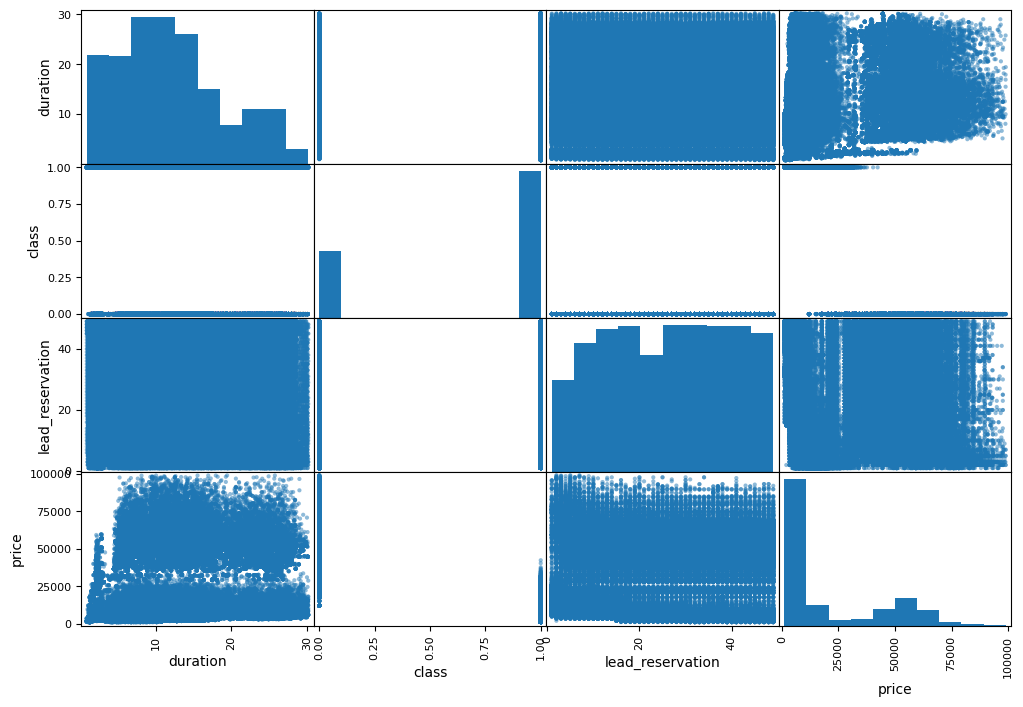

In [812]:
from pandas.plotting import scatter_matrix
attributes=["duration","class","lead_reservation","price"]
scatter_matrix(flight[attributes], figsize=(12,8))

In [813]:
flight['stops'].value_counts()

one            249478
zero            36004
two_or_more     12438
Name: stops, dtype: int64

### **Random Forest**

In [814]:
flightX = train_set.drop("price", axis =1)
flightX = train_set["price"].copy()
X_train, X_test, y_train, y_test = train_test_split(flightX, flightX, test_size=0.2, random_state=42)